# Word Vectors

## Обзор модуля `gensim.models.keyedvectors`

Будем использовать эмбеддинги 3-ех миллионов слов, размерностью 300, обученные на 3 миллиардах слов из *Google News corpus (circa 2015)*.

In [1]:
!gdown -c "https://drive.google.com/uc?id=1rDtnXKem2xAiRgdcPff84R526NMp0q9t"

Skipping already downloaded file GoogleNews-vectors-negative300.bin.gz


In [2]:
embedding_file = "./GoogleNews-vectors-negative300.bin.gz"

В библиотеке `gensim` есть модуль `KeyedVectors`, позволяющий нам получать *векторы по токенами и индексам*.

Возьмем только 200 000 векторов, чтобы не тратить много времени на обработку и не занимать много памяти

In [3]:
from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format(
    embedding_file, binary=True, limit=200_000
)

Пример получения вектора по токену

In [4]:
pizza = word_vectors["pizza"]
print(f"Размерность вектора: {pizza.shape}")

print(pizza)

Размерность вектора: (300,)
[-1.25976562e-01  2.53906250e-02  1.66992188e-01  5.50781250e-01
 -7.66601562e-02  1.28906250e-01  1.02539062e-01 -3.94821167e-04
  1.21582031e-01  4.32128906e-02  1.72851562e-01 -6.83593750e-02
  3.41796875e-01  8.39843750e-02  6.68945312e-02  2.67578125e-01
 -3.71093750e-02 -5.56640625e-02  1.80664062e-01  1.90429688e-02
 -5.07812500e-02  9.03320312e-03  1.76757812e-01  6.49414062e-02
 -6.25000000e-02 -9.42382812e-02 -9.71679688e-02  4.00390625e-01
  1.15234375e-01  1.02539062e-01 -1.86767578e-02 -2.69531250e-01
  1.80664062e-01  1.25000000e-01 -3.17382812e-02 -5.49316406e-02
  3.45703125e-01 -1.57470703e-02  1.82390213e-05  2.07031250e-01
 -1.25976562e-01 -2.83203125e-01  2.00195312e-01  8.34960938e-02
 -4.73632812e-02 -3.11279297e-02 -2.61718750e-01  1.69921875e-01
 -2.02636719e-02  1.53320312e-01 -1.20605469e-01  3.75000000e-01
 -5.68847656e-02 -4.76074219e-03 -1.95312500e-01 -2.03125000e-01
  3.00781250e-01 -1.01074219e-01 -3.18359375e-01 -9.03320312e-

Можем посмотреть косинусную схожесть двух векторов.
Слова, для которых мы ожидаем большую схожесть...

In [5]:
print(word_vectors.similarity("pizza", "tomato"))
print(word_vectors.similarity("pizza", "sauce"))
print(word_vectors.similarity("pizza", "cheese"))

0.35505623
0.36959887
0.4708358


...слова, для которых мы не ожидаем схожести

In [6]:
print(word_vectors.similarity("pizza", "gorilla"))
print(word_vectors.similarity("pizza", "tree"))
print(word_vectors.similarity("pizza", "yoga"))

0.108518735
0.11185602
0.14119941


Попытка получить вектор слова, который не входит в наш словарь, приводит к ошибке

In [7]:
try:
    word_vectors["womblyboo"]
except KeyError as e:
    print(e)

"Key 'womblyboo' not present"


Мы можем сравнить *схожесть двух предложений* используя `.n_similarity`, который сравнивает схожесть двух наборов слов.

Метод принимает списки токенов, усредняет векторы слов в этих предложениях и считает схожесть этих двух усредненных векторов. 

In [8]:
word_vectors.n_similarity("dog bites man".split(), "canine nips human".split())

0.53146607

In [9]:
word_vectors.n_similarity(
    "martian dolphins are hostile".split(),
    "i flunked calligraphy school".split(),
)

0.1450578

Нужно помнить, что порядок слов в предложении не играют роли, поэтому разные по смыслу предложения, но одинаковые по составу слов, дадут большое значение схожести

In [10]:
word_vectors.n_similarity("dog bites man".split(), "man bites dog".split())

1.0

`.most_similar` возвращает наиболее схожие векторы

In [11]:
word_vectors.most_similar(positive=["cell"], topn=10)

[('cells', 0.8180485367774963),
 ('Cells', 0.6146953105926514),
 ('Cell', 0.5321314930915833),
 ('cellular', 0.5272858142852783),
 ('tumor_cells', 0.5097643136978149),
 ('ES_cells', 0.4866572618484497),
 ('immune_cells', 0.4831920266151428),
 ('epithelial_cells', 0.47818055748939514),
 ('molecule', 0.47757473587989807),
 ('proteins', 0.4749472737312317)]

Также можно объединить (усреднить) несколько векторов и найти к этому объединенному вектору наиболее схожие.

In [12]:
word_vectors.most_similar(positive=["cell", "phone"], topn=10)

[('cell_phone', 0.6861391067504883),
 ('cellular', 0.6757438778877258),
 ('cellphone', 0.6633196473121643),
 ('telephone', 0.6474039554595947),
 ('Phone', 0.605189323425293),
 ('phones', 0.5896332859992981),
 ('cells', 0.585094690322876),
 ('cordless_phone', 0.5711769461631775),
 ('Cell', 0.5617641806602478),
 ('landline', 0.5467296242713928)]

`.doesnt_match` находит слова из переданного списка, которое дальше всего стоит от среднего векторов этих слов

In [13]:
word_vectors.doesnt_match(["apple", "orange", "hamburger", "banana", "kiwi"])

'hamburger'

Можно убедиться в силе контекста, посмотрев на следующий пример, где, очевидно "Toyota" является лишним

In [14]:
word_vectors.doesnt_match(
    ["Microsoft", "Apple", "Toyota", "Amazon", "Netflix", "Google"]
)

'Toyota'

## Визуализация эмбеддингов

Можно визуализировать векторы слов, но сначала их нужно перевести в двухмерное пространство. Это можно сделать с помощью *Метода главных компонент (Principal Components Analysis) PCA*.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def display_pca_scatterplot(model, words):
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:, :2]

    plt.figure(figsize=(10, 10))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors="k", c="r", s=128)
    for word, (x, y) in zip(words, twodim):
        plt.text(x + 0.05, y + 0.05, word)

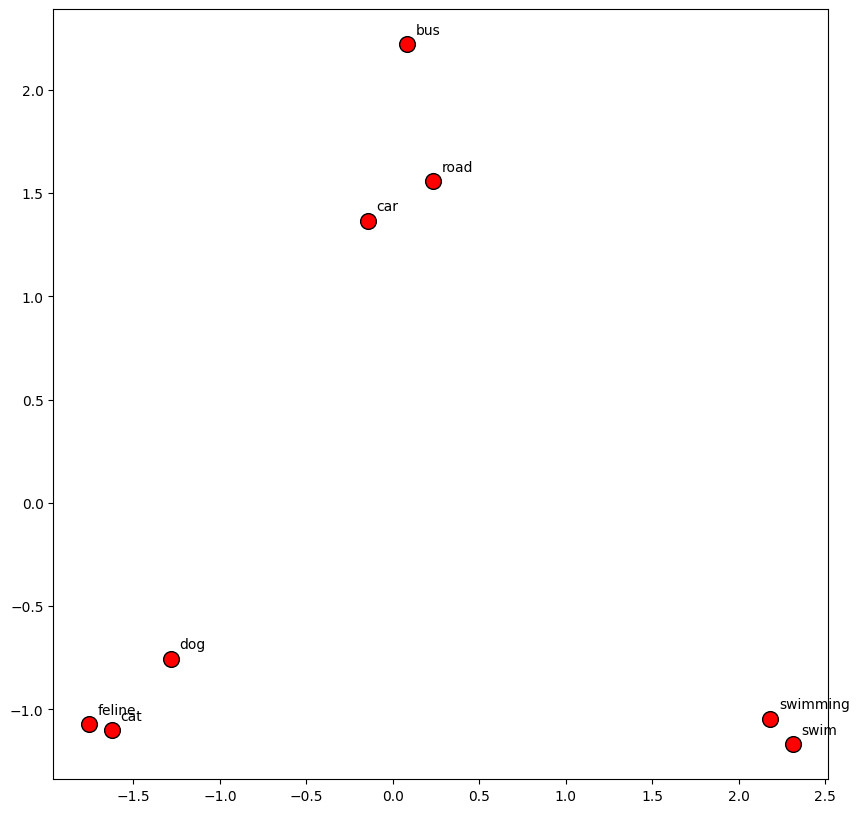

In [16]:
display_pca_scatterplot(
    word_vectors,
    ["swim", "swimming", "cat", "dog", "feline", "road", "car", "bus"],
)

## Векторные операции

Можно также проводить векторные операции с эмбеддингами.

Например:

*Rome is to Italy as London is to ___*

Получается, что 
$$\begin{align*}
Italy - Rome = XXX - London \\
XXX = Italy + London - Rome
\end{align*}
$$

In [17]:
word_vectors.most_similar(
    positive=["Italy", "London"], negative=["Rome"], topn=3
)

[('UK', 0.6230568885803223),
 ('Britain', 0.6016390323638916),
 ('United_Kingdom', 0.534345805644989)]

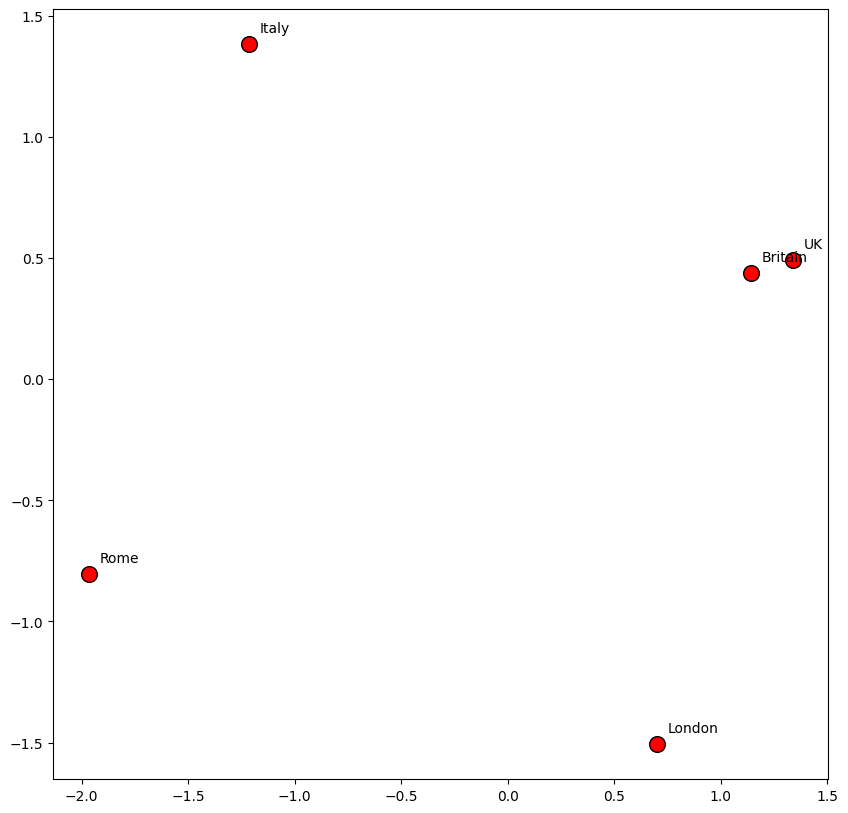

In [18]:
display_pca_scatterplot(
    word_vectors, ["Rome", "Italy", "London", "Britain", "UK"]
)